Load Model and Data

In [1]:
from utils import load_model, get_concept_encodings
from data import build_icl_examples

model, tokenizer = load_model()
icl_examples = build_icl_examples(n_shot=5, cap_num=100)

Get Concept Encoding of addition

In [ ]:
from utils import get_concept_encoding

icl_prompt = "1 1 -> 2, 1 3 -> 4, 2 1 -> 3, 2 3 -> 5, 3 1 -> 4, 3 3 -> 6" # ICL examples of addition
concept_encoding = get_concept_encoding(model, tokenizer, icl_prompt, layer_idx=5, token_idx=-1)
concept_encoding.detach().numpy()

Compute Concept Decodability


Computing concept encodings: 100%|██████████| 7/7 [01:16<00:00, 10.90s/it]


<module 'matplotlib.pyplot' from '/opt/homebrew/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

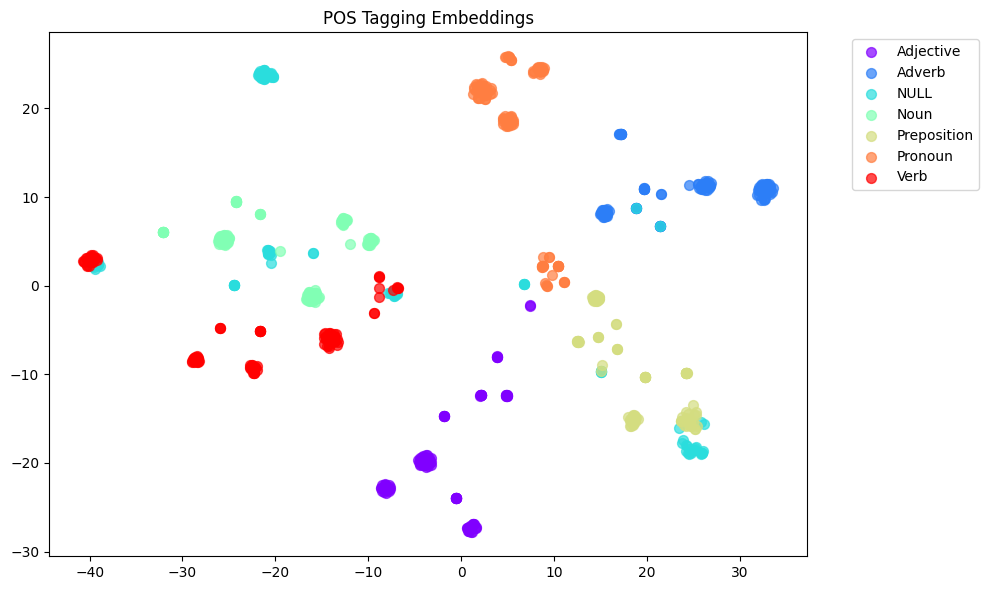

In [8]:
from utils import compute_concept_decodability, visualize_concept_embeddings

concept_scores, X, y = compute_concept_decodability(model, tokenizer, icl_examples, layer_idx=5, token_idx=-1)

visualize_concept_embeddings(X, y, title="POS Tagging Embeddings")

N-shot Comparison

In [9]:
from utils import plot_multiple_shots

shots = [1, 2, 4, 6, 10]
concept_examples_list = [build_icl_examples(n_shot=shot, cap_num=100) for shot in shots]
concept_scores_list = [compute_concept_decodability(model, tokenizer, concept_examples, layer_idx=5, token_idx=-1) for concept_examples in concept_examples_list]
plot_multiple_shots(model, tokenizer, concept_examples_list, layer_idx=5, token_idx=-1)

Computing concept encodings:  71%|███████▏  | 5/7 [01:22<00:32, 16.44s/it]